<a href="https://colab.research.google.com/github/Somnath1998g/Self-Projects/blob/main/Netflix_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

## Data Loading

In [ ]:
dataset_url="https://www.kaggle.com/datasets/jainilcoder/netflix-stock-price-prediction"

In [ ]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: somnathghoshma22m020
Your Kaggle Key: ··········


100%|██████████| 20.9k/20.9k [00:00<00:00, 29.4MB/s]

In [ ]:
import os

In [ ]:
data_dir="./netflix-stock-price-prediction"

In [ ]:
os.listdir(data_dir)

['NFLX.csv']

In [ ]:
train_csv=data_dir+'/NFLX.csv'

In [ ]:
df = pd.read_csv(train_csv)

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [ ]:
viz = df.copy()

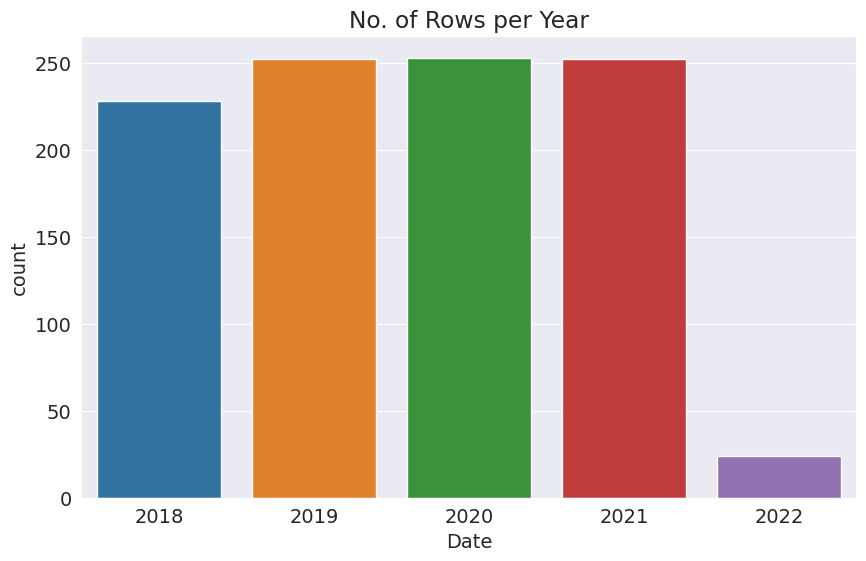

In [ ]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(df.Date).dt.year);

## Data preparation

In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.shape

(1009, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [ ]:
df["Date"].min()

'2018-02-05'

In [ ]:
df["Date"].max()

'2022-02-04'

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


## Model Visualization

In [ ]:
def style():
    plt.figure(facecolor='black', figsize=(15,10))
    ax = plt.axes()

    ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to white
    ax.tick_params(axis='y', colors='white')    #setting up Y-axis tick color to white

    ax.spines['left'].set_color('white')        #setting up Y-axis spine color to white
    #ax.spines['right'].set_color('white')
    #ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')      #setting up X-axis spine color to white

    ax.set_facecolor("black")                  # Setting the background color of the plot using set_facecolor() method

In [ ]:
viz['Date']=pd.to_datetime(viz['Date'],format='%Y-%m-%d')

In [ ]:
data = pd.DataFrame(viz[["Date","Close"]])
data = data.reset_index()
data= data.drop('index',axis=1)
data.set_index('Date',inplace= True)
data = data.asfreq('D')
data

,Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


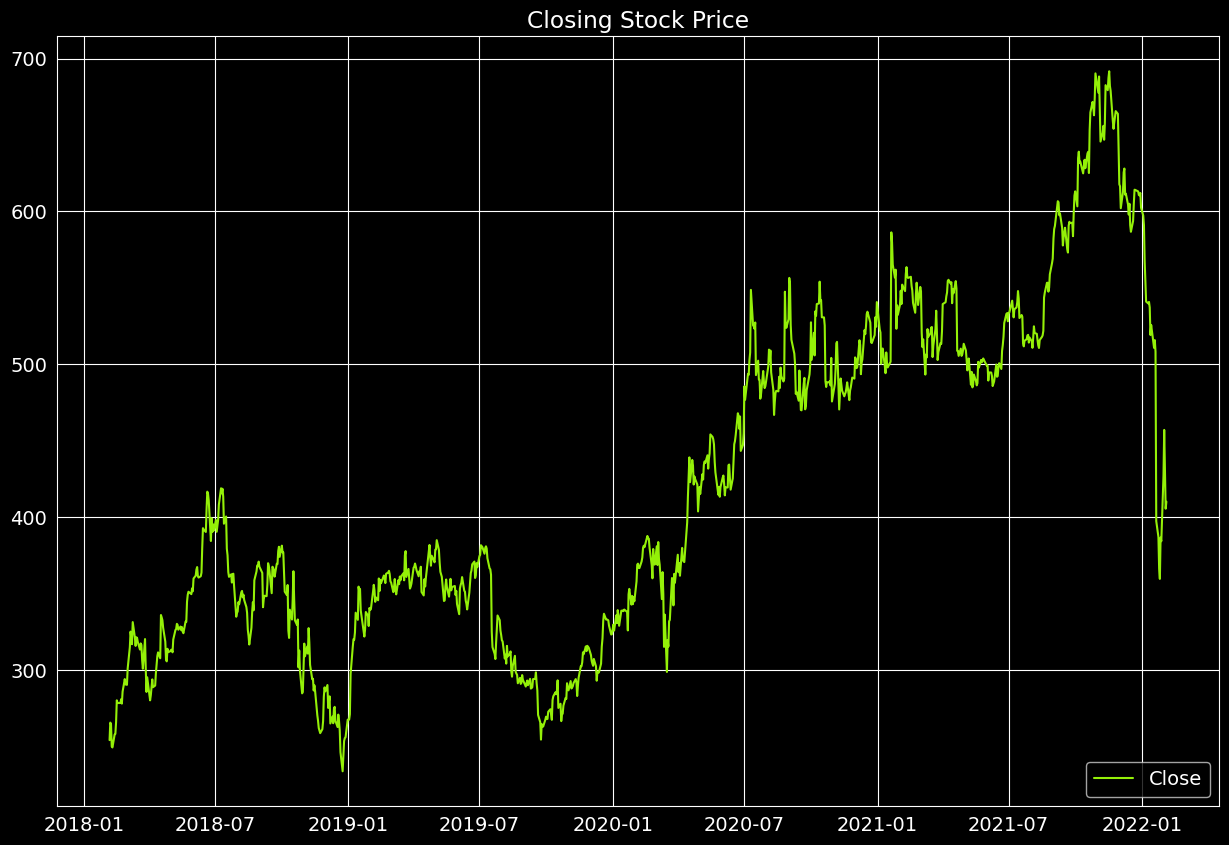

In [ ]:
style()

plt.title('Closing Stock Price', color="white")
plt.plot(viz.Date, viz.Close, color="#94F008")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')



In [ ]:
fig = px.scatter(viz,
                 x='Open',
                 y='Close',

                 opacity=0.8,

                 title='Open VS Close')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
fig = px.scatter(viz,
                 x='High',
                 y='Close',
                 opacity=0.8,

                 title='High VS Close')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
fig = px.scatter(viz,
                 x='Low',
                 y='Close',
                 opacity=0.8,

                 title='Low VS Close')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
fig = px.scatter(viz,
                 x='Volume',
                 y='Close',
                 opacity=0.8,

                 title='Volume VS Close')
fig.update_traces(marker_size=5)
fig.show()

## Taking Train and Test data

In [ ]:
year=pd.to_datetime(df.Date).dt.year

In [ ]:
train = df[year<=2021]
test = df[year>2021]

In [ ]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [ ]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
985,2022-01-03,605.609985,609.989990,590.559998,597.369995,597.369995,3067500
986,2022-01-04,599.909973,600.409973,581.599976,591.150024,591.150024,4393100
987,2022-01-05,592.000000,592.840027,566.880005,567.520020,567.520020,4148700
988,2022-01-06,554.340027,563.359985,542.010010,553.289978,553.289978,5711800
989,2022-01-07,549.460022,553.429993,538.219971,541.059998,541.059998,3381700


In [ ]:
test_pred = test.copy()

In [ ]:
train_df=df[['Open', 'High', 'Low', 'Volume']]

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1009 non-null   float64
 1   High    1009 non-null   float64
 2   Low     1009 non-null   float64
 3   Volume  1009 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 31.7 KB


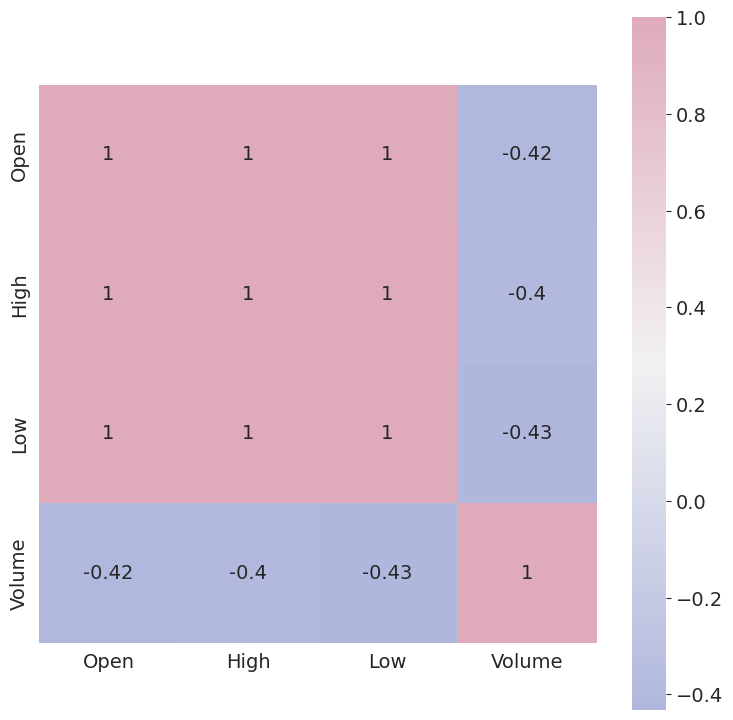

In [ ]:
corrmat = train_df.corr()
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True);

In [ ]:
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values

In [ ]:
y_train = train['Close'].values
y_test = test["Close"].values

## Linear Regression

In [ ]:
model_lnr = LinearRegression()
model_lnr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred=model_lnr.predict(x_test)

In [ ]:
result = model_lnr.predict([[262.000000, 267.899994, 250.029999, 11896100]])
print(result)

[257.44113198]


## Model Evaluation

In [ ]:
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))

MSE 57.829
RMSE 7.605
MAE 5.897
MAPE 0.013
R2 Score :  0.99


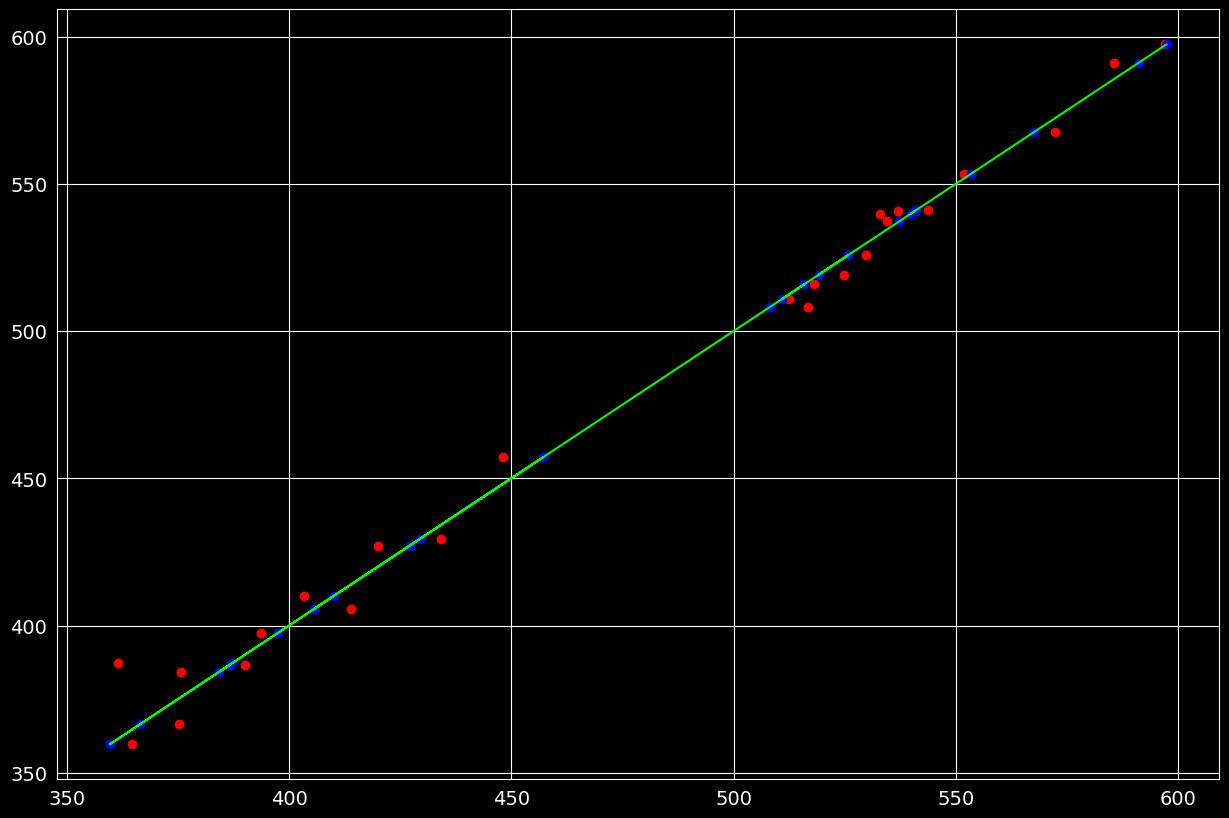

In [ ]:
style()

plt.scatter(y_pred, y_test, color='red', marker='o')
plt.scatter(y_test, y_test, color='blue')
plt.plot(y_test, y_test, color='lime')